In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import itertools

#1. Create a graph with n nodes where n are the countries

In [29]:
G = nx.Graph()
n = 5
G.add_nodes_from([i for i in range(1,n+1)])
mapping = {1:'alxea', 2 : 'india', 3 : 'america', 4: 'uk', 5: 'cannada', 6: 'indo', 7 :'italy', 8: 'newzealand', 9:'srilanka', 10: 'duabai',11:'nepal', 12:'lomdon', 13:'singapore', 14:'korea', 15:'japan'}
G = nx.relabel_nodes(G, mapping)



In [30]:
signs = ['+','-']
for i in G.nodes():
    for j in G.nodes():
        if i!=j:
            G.add_edge(i,j, sign= random.choice(signs))

{('alxea', 'india'): Text(0.654508480212244, 0.4755283023511464, '-'),
 ('alxea', 'america'): Text(0.09549145273252935, 0.2938926212887637, '-'),
 ('alxea', 'uk'): Text(0.09549151233717518, -0.2938926630120157, '+'),
 ('alxea', 'cannada'): Text(0.6545085547180512, -0.4755282248651067, '-'),
 ('india', 'america'): Text(-0.2500000670552266, 0.7694208997980517, '-'),
 ('india', 'uk'): Text(-0.2500000074505807, 0.1816356154972723, '+'),
 ('india', 'cannada'): Text(0.30901703493029536, 5.3644181319256745e-08, '-'),
 ('america', 'uk'): Text(-0.8090170349302954, -6.55651103964594e-08, '+'),
 ('america', 'cannada'): Text(-0.24999999254941926, -0.18163562741820138, '-'),
 ('uk', 'cannada'): Text(-0.24999993294477343, -0.7694209117189807, '-')}

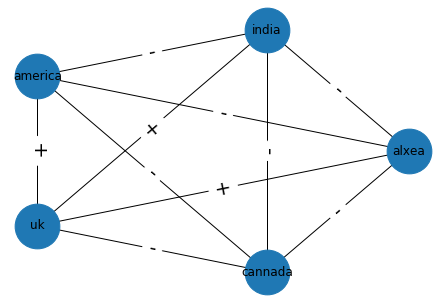

In [37]:
edge_labels = nx.get_edge_attributes(G, 'sign')
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels = True, node_size = 2000)
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_labels, font_size = 20)

4. Get the listt of the all triangles from the networks and store them
count the number of unstable networks or triangles within the network

In [38]:
nodes = G.nodes()
tris_list = [list(x) for x in itertools.combinations(nodes,3)]

4.2  store the all signs the  triangles

In [41]:
def get_signs_of_tris_list(tris_list, G):
    #tris_list = [[1,2,3], [3,4,5]]
    # all_signs = [['+','+','+'], ['-','+','+']]
    all_signs= []
    for i in range(len(tris_list)):
        temp = []
        temp.append(G[tris_list[i][0]][tris_list[i][1]]['sign'])
        temp.append(G[tris_list[i][1]][tris_list[i][2]]['sign'])  
        temp.append(G[tris_list[i][2]][tris_list[i][0]]['sign'])  
        all_signs.append(temp)
    return all_signs

In [42]:
all_signs = get_signs_of_tris_list(tris_list, G) # this list will have the signing details of every edge

4.3 Counting the number of unstable triangles in the network

In [45]:
def count_unstable(all_signs):
    stable = 0
    unstable = 0
    for i in range(len(all_signs)):
        if all_signs[i].count("+") ==3 or all_signs[i].count("+") == 1:
            stable+=1
        elif all_signs[i].count("+") ==2 or all_signs[i].count("+") ==0:
            unstable +=1
    print('stable', stable, 'unstable', unstable)

In [46]:
unstable = count_unstable(all_signs)

stable 3 unstable 7
